📦 Install Dependencies

In [ ]:
!pip install tensorflow

🧠 Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

🔗 Load Dataset from Google Drive

In [11]:
drive.mount('/content/drive')
data_path="/content/data.csv"
data=pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 📄 Assign Column Names


In [12]:
columns = ['id', 'diagnosis',
           'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
           'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean',
           'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
           'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
           'fractal_dimension_se',
           'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
           'smoothness_worst', 'compactness_worst', 'concavity_worst',
           'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [16]:
data.columns=columns

In [15]:
data = data.drop(columns=['Unnamed: 32'])

In [17]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 🧹 Data Cleaning and Preprocessing


In [18]:
data=data.drop(columns=['id','Unnamed:32'],errors='ignore')

## 🧬 Encode Diagnosis Labels (M → 1, B → 0)


In [19]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

## 📊 Splitting Features (X) and Target (y)


In [20]:
x=data.drop('diagnosis',axis=1).values
y=data['diagnosis'].values

## 🧪 Train-Test Split


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## 📏 Feature Scaling (Standardization)


In [23]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## 🧠 Build the Neural Network Model (Sequential)


In [24]:
model=Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

## ⚙️ Compile and Train the Model


In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(x_train,y_train,epochs=100,batch_size=16,validation_split=0.1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5677 - loss: 0.6719 - val_accuracy: 0.8261 - val_loss: 0.5114
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8201 - loss: 0.4811 - val_accuracy: 0.8913 - val_loss: 0.3489
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9171 - loss: 0.3228 - val_accuracy: 0.9130 - val_loss: 0.2579
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9434 - loss: 0.2439 - val_accuracy: 0.9130 - val_loss: 0.2070
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - loss: 0.1994 - val_accuracy: 0.9130 - val_loss: 0.1769
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9447 - loss: 0.1739 - val_accuracy: 0.9130 - val_loss: 0.1586
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9574 - loss: 0.1325 - val_accuracy: 0.9130 - val_loss: 0.1457
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9671 - loss: 0.1273 - val_accuracy: 0.9348 - 

## ✅ Evaluate the Model on Test Data


In [27]:
predictions=model.predict(x_test)
predicted_classes=(predictions >=0.5).astype(int).flatten()
for i in range(10):
  print(f"Predicted: {predicted_classes[i]}, Actual: {y_test[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


In [30]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"\nTest accuracy: {accuracy*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9794 - loss: 0.1413 

Test accuracy: 98.25%


## 📈 Plot Accuracy and Loss Curves


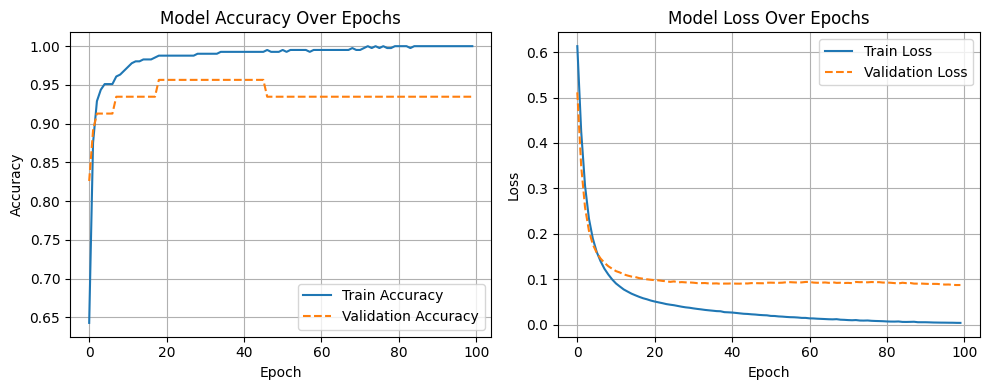

In [31]:
# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 🧪 Final Evaluation Metrics


In [33]:
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)

print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=['Benign (0)', 'Malignant (1)']))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
🔹 Accuracy: 0.9825
🔹 Precision: 0.9767
🔹 Recall: 0.9767
🔹 F1 Score: 0.9767

📄 Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.99      0.99      0.99        71
Malignant (1)       0.98      0.98      0.98        43

     accuracy                           0.98       114
    macro avg       0.98      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114



📉 Plot Confusion Matrix

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


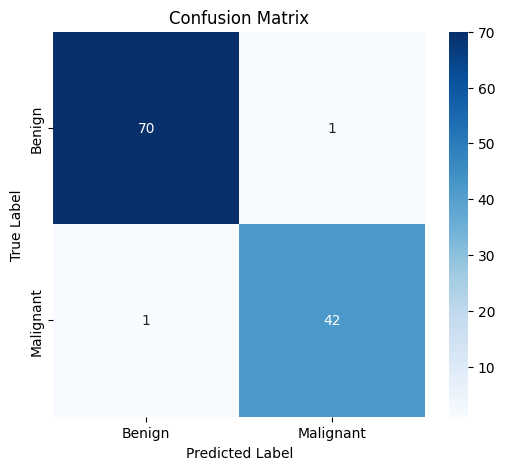

In [35]:
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
